In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Insertion sort

In [ ]:
def insertionSort(arr):

    for i in range(1, len(arr)): # Traverse through array from index 1

        key = arr[i] # Pick up value at each index starting from index 1

        j = i-1 # j is to present the indexes before the key index
        while j >= 0 and key < arr[j] :
            arr[j + 1] = arr[j]
            j -= 1
            # While the elements before the key are greater than the key
            # Move elements one to the right
        arr[j + 1] = key
        # Once the element is smaller than the key
        # Insert the key to the right of that element
    return arr

Merge sort

In [ ]:
def merge(arr1, arr2):
    i = j = 0
    sorted_arr = []
    while (i != len(arr1) and j != len(arr2)):
        if arr1[i] < arr2[j]:
            sorted_arr.append(arr1[i])
            i += 1
        elif arr1[i] > arr2[j]:
            sorted_arr.append(arr2[j])
            j += 1
        else:
            sorted_arr.append(arr1[i])
            sorted_arr.append(arr2[j])
            i += 1
            j += 1
    while i != len(arr1):
        sorted_arr.append(arr1[i])
        i += 1
    while j != len(arr2):
        sorted_arr.append(arr2[j])
        j += 1
    return sorted_arr

Hybrid Sort

In [ ]:
def hybridSort(arr,S):
    if len(arr)<=1:
        return arr

    if len(arr) > S:
        m = len(arr)//2 # Find midpoint m

        # Sort first and second halves
        arr[:m] = hybridSort(arr[:m],S)
        arr[m:] = hybridSort(arr[m:],S)
        arr = merge(arr[:m], arr[m:])

        return arr
    else:
        arr = insertionSort(arr)
        return arr

In [ ]:
arr = [3,6,8,9,2,1,4,5,10,7,12,11,3,3,3]
a = hybridSort(arr,4)
print(a)
type(a)

[1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


list

Generate input data

In [ ]:
arrSizes = []

for i in range(10):
    arrSizes.append(1000*(i+1))
    arrSizes.append(10000*(i+1))
    arrSizes.append(100000*(i+1))
    arrSizes.append(1000000*(i+1))

In [ ]:
arrSizes = list(dict.fromkeys(arrSizes))
arrSizes.sort()
print(arrSizes)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [ ]:
arrOfArrays = []


for siz in arrSizes:
    arr = np.random.randint(1000, size=siz)
    arrOfArrays.append(arr)

print(arrOfArrays[0])

[341 871 176 355 968 324  84  99 131 721  38 805  25 996 356 237 689 202
  93  11 120 336 328 140 229 368 939 289 290 858 878 753 639 131 374 388
 729 346 706 245 194  12 645  81 879 260 140 222   6 899 105 384 867 937
 481 511 715 682 230 659 550 592 337 268 590 147  69 785 421  15 103 392
 527 540   8 765 540 391 307 348 786 185 355 676 657 152 459 320 983 450
 760 621 586 825  58  91 232 689 267 722 619  25 657 339 208 913 665 748
 994 954 152 100 974 692 922 236 876 959 255 824 734 135 523 233 331 110
 707 950 644 622 904 513 135 201 142 586 476 579  39 563 681 451 710 877
 148 146 896 280 491 201 881 758 668 842  27 962  88 659 351 800 793  62
 417 640 614 518 732 482 153 945 368 460 708  17 835 940 753  65 459 589
 788 159 912 927  82 276 954 350  80 677 456 375 314 405  17 388 375 476
 316 407 411 837 515 882 230 510 973 643 101 164 666 943 912 182 164 661
 499 609 139  98 590 183 544 931 791 886 474 404 958 313 436 525 920 892
 705 306 285 741 282 985 278 655 636  89 769 636 46

Analyse time complexity

Count key comparison

In [ ]:
def insertionSort2(arr):
    comparisons = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j] :
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
        if j > 0 :
            comparisons += 1
        arr[j + 1] = key
    return arr, comparisons

def merge2(arr1, arr2):
    comparisons = 0
    i = j = 0
    sorted_arr = []
    while (i != len(arr1) and j != len(arr2)):
        if arr1[i] < arr2[j]:
            sorted_arr.append(arr1[i])
            i += 1
        elif arr1[i] > arr2[j]:
            sorted_arr.append(arr2[j])
            j += 1
        else:
            sorted_arr.append(arr1[i])
            sorted_arr.append(arr2[j])
            i += 1
            j += 1
        comparisons += 1
    while i != len(arr1):
        sorted_arr.append(arr1[i])
        i += 1
    while j != len(arr2):
        sorted_arr.append(arr2[j])
        j += 1
    return sorted_arr, comparisons

def hybridSort2(arr,S):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons

    if len(arr) > S:

        m = len(arr)//2

        arr[:m], first_half_comparisons = hybridSort2(arr[:m],S)
        comparisons += first_half_comparisons

        arr[m:], second_half_comparisons = hybridSort2(arr[m:],S)
        comparisons += second_half_comparisons

        arr, merge_comparisons = merge2(arr[:m], arr[m:])
        comparisons += merge_comparisons

        return arr, comparisons

    else:

        arr, comparisons = insertionSort2(arr)
        return arr, comparisons

# def hybridSort3(arr, S):
#     comparisons = 0
#     if len(arr) <=1:
#         return arr, comparisons
#     # Mergesort if Arr > size S
#     if len(arr) > S:
#         # Finding the mid of the array
#         mid = len(arr)//2

#         # Sorting the first half of the array
#         arr[:mid], temp = hybridSort2(arr[:mid], S)
#         comparisons += temp

#         # Sorting the second half of the array
#         arr[mid:], temp = hybridSort2(arr[mid:], S)
#         comparisons += temp

#         i = 0
#         j = mid

#         # Merge 2 halves of the array
#         while i < j and j < len(arr):
#             if arr[i] <= arr[j]:
#                 i += 1
#             else:
#                 item = arr[j]
#                 arr[i+1:j+1] = arr[i:j]
#                 arr[i] = item
#                 i += 1
#                 j += 1
#             comparisons += 1

#         return arr, comparisons
#     else:
#         arr, comparisons = insertionSort2(arr)
#         return arr, comparisons

With s fixed, plot key comparisons with different sizes of n

In [ ]:
from random import seed
from random import randint

np.random.seed(22)
arrSize = []

for i in range(1000):
    arrSize.append(i)

s = 10

if __name__ == '__main__':
    sizeComparisons = []
    for siz in arrSize:
        arr = np.random.randint(10000, size=siz)
        arr, comparisons = hybridSort2(arr,s)
        sizeComparisons.append(comparisons)

In [ ]:
import math

theorectical_comparisons = []
for siz in arrSize:
    if siz == 0:
        theorectical_comparisons.append(0)
    else:
        c = siz * math.log2(siz/s) - (siz/s - 1) + siz/s * (s-1) * (s+2)/4
        theorectical_comparisons.append(c)

Text(0.5, 1.0, 'Key Comparisons against Array Size')

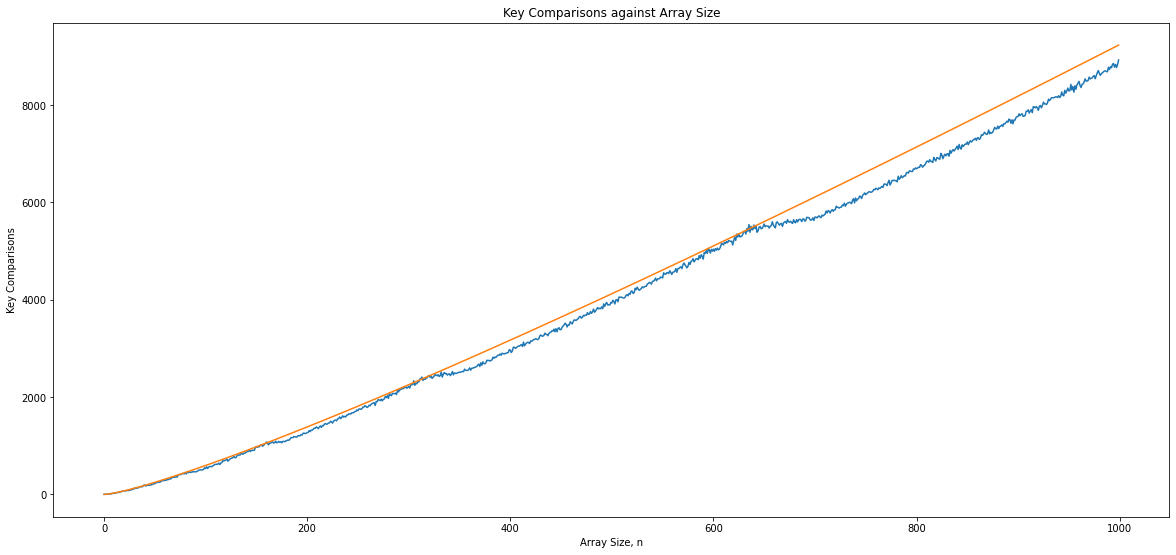

In [ ]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arrSize, sizeComparisons)
ax.plot(arrSize, theorectical_comparisons)
ax.set_xlabel("Array Size, n")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size")

N is fixed different S

In [ ]:
np.random.seed(22)
if __name__ == '__main__':
 sValues = range(0,100)
 arraySize = 10000 # Set array size to 10000
 sComparisons = []
 for s in sValues:
    arr = np.random.randint(10000,size = arraySize)
    arr, comparisons = hybridSort2(arr,s)
    sComparisons.append(comparisons)

In [ ]:
theorectical_comparisons = []
for s in sValues:
    if s == 0:
        theorectical_comparisons.append(0)
    else:
        a = arraySize * math.log2(arraySize/s) - (arraySize/s - 1) + arraySize/s * (s-1) * (s+2)/4
        theorectical_comparisons.append(a)

Text(0.5, 1.0, 'Key Comparisons against Threshold Values, S')

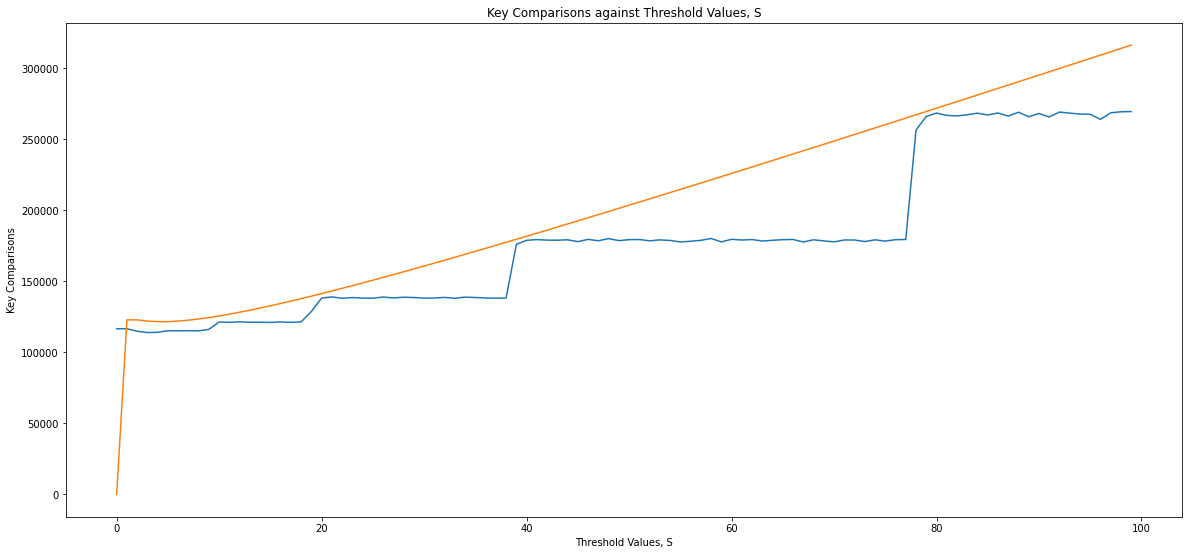

In [ ]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sValues,sComparisons)
ax.plot(sValues,theorectical_comparisons)
ax.set_xlabel("Threshold Values, S")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Threshold Values, S")

Determine optimal S


In [ ]:
def mergeSort(arr):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons
    else:
        m = len(arr)//2
        arr[:m], first_half_comparisons = mergeSort(arr[:m])
        comparisons += first_half_comparisons
        arr[m:], second_half_comparisons = mergeSort(arr[m:])
        comparisons += second_half_comparisons
        arr, merge_comparisons = merge2(arr[:m], arr[m:])
        comparisons += merge_comparisons

        return arr, comparisons

Optimal S is: 9


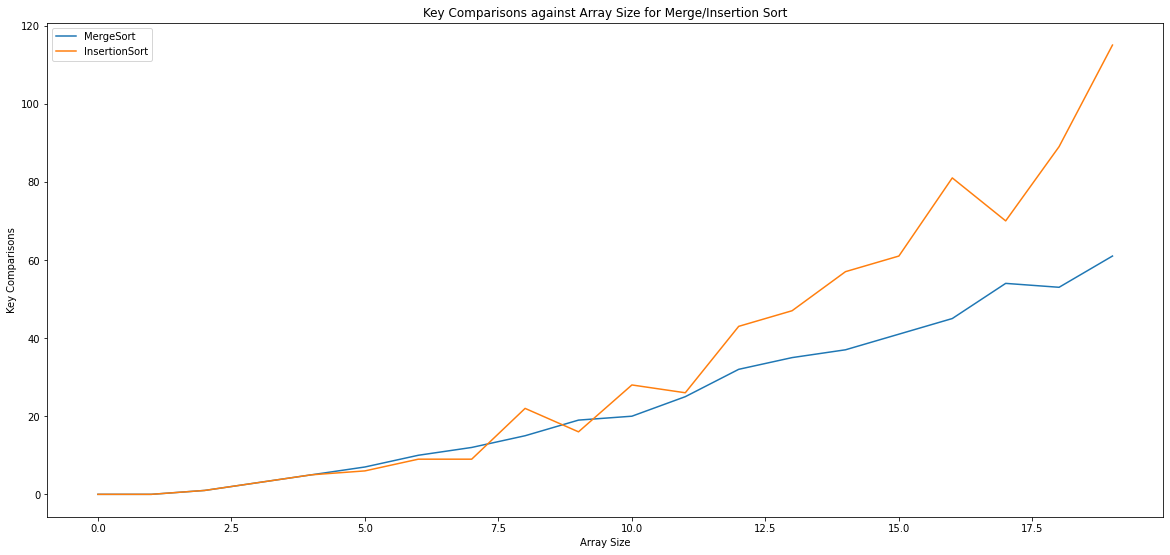

In [ ]:
np.random.seed(22)
if __name__ == '__main__':
 optimalS = 0
 arraySize = range(0,20)
 mergeComparisons = []
 insertionComparisons = []
 mergeComparison = 0
 for s in arraySize:
    arr = np.random.randint(10000,size = s)
    arr2 = arr.copy()
    arr,mergeComparison = mergeSort(arr)
    arr2, insertionComparison = insertionSort2(arr2)
    if insertionComparison < mergeComparison:
        optimalS = s
    mergeComparisons.append(mergeComparison)
    insertionComparisons.append(insertionComparison)

f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arraySize,mergeComparisons, label="MergeSort")
ax.plot(arraySize, insertionComparisons, label = "InsertionSort")
ax.set_xlabel("Array Size")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size for Merge/Insertion Sort")
ax.legend()

print('Optimal S is:', optimalS)

Compare with orginal merge sort


In [ ]:
np.random.seed(22)
if __name__ == '__main__':
        arr10mil = []
        arr10mil = np.random.randint(10000000,size =10000000)
        arr10mil_2 = arr10mil.copy()

        start_time1 = time.time()
        arr10mil, hybridComparisons = hybridSort2(arr10mil, 7)
        end_time1 = (time.time() - start_time1)

        start_time2 = time.time()
        arr10mil_2, mergeComparisons = mergeSort(arr10mil_2)
        end_time2 = (time.time() - start_time2)

print("CPU Time for Hybrid Sort is:", end_time1)
print("CPU Time for Merge Sort is:", end_time2)
print("Key Comparisons for Hybrid Sort is:", hybridComparisons)
print("Key Comparisons for Merge Sort is:", mergeComparisons)

CPU Time for Hybrid Sort is: 187.31814908981323
CPU Time for Merge Sort is: 214.87813806533813
Key Comparisons for Hybrid Sort is: 214736396
Key Comparisons for Merge Sort is: 216324238
